<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1">Logistic Regression</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#FIRST-way-to-formulate-the-Logistic-Regression:" data-toc-modified-id="FIRST-way-to-formulate-the-Logistic-Regression:-1.0.0.1">FIRST way to formulate the Logistic Regression:</a></span></li><li><span><a href="#SECOND-way-to-formulate-the-Logistic-Regression:" data-toc-modified-id="SECOND-way-to-formulate-the-Logistic-Regression:-1.0.0.2">SECOND way to formulate the Logistic Regression:</a></span></li><li><span><a href="#Mathematical-Equations:" data-toc-modified-id="Mathematical-Equations:-1.0.0.3">Mathematical Equations:</a></span></li><li><span><a href="#API-(sklearn.linear_model.LogisticRegression):" data-toc-modified-id="API-(sklearn.linear_model.LogisticRegression):-1.0.0.4">API (sklearn.linear_model.LogisticRegression):</a></span></li><li><span><a href="#Dataset:" data-toc-modified-id="Dataset:-1.0.0.5">Dataset:</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-1.0.0.6">Model</a></span></li><li><span><a href="#Evaluations:" data-toc-modified-id="Evaluations:-1.0.0.7">Evaluations:</a></span></li><li><span><a href="#Multi-class-Logistic-Regressio-(Softmax)" data-toc-modified-id="Multi-class-Logistic-Regressio-(Softmax)-1.0.0.8">Multi-class Logistic Regressio (Softmax)</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Interview-Questions" data-toc-modified-id="Interview-Questions-2">Interview Questions</a></span></li></ul></div>

## Logistic Regression

##### FIRST way to formulate the Logistic Regression:

\begin{split}
    J(\boldsymbol{\theta})
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)} log\left( \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) + (1 - y^{(i)}) log\left(1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)\right]}\\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[ y^{(i)} log\left( (1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-1} \right) + (1 - y^{(i)}) log\left(1 - (1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-1} \right)\right]}
\end{split}

\begin{split}
    \frac{J}{d \mathbf{\boldsymbol{\theta}}} (\boldsymbol{\theta})
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
         \frac{- y^{(i)} {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}(e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})(-\mathbf{x^{(i)}})}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
         + \frac{(1 - y^{(i)})(-)(-) {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}(e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})(-\mathbf{x^{(i)}}) }} {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
         \right]} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
        \right]} \cdot {(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}})^{-2}{e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} } \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} }
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\frac{e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}{ \left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} } \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)}} {\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}}
            - \frac{(1 - y^{(i)}) } {1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} }
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)} \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \frac{y^{(i)} - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}} { \left( \frac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)}}
        \right]} \cdot \frac{1}{\left(1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)} \cdot {\left( 1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)} \cdot {\mathbf{x^{(i)}}} \\
    & = -\dfrac{1}{m} \sum_{i=1}^{m}{\left[
        y^{(i)} - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}
        \right]} \cdot {\mathbf{x^{(i)}}} \\
    & = \dfrac{1}{m} \sum_{i=1}^{m}{\left[
            \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} - y^{(i)}
            \right]} \cdot {\mathbf{x^{(i)}}}
\end{split}

##### SECOND way to formulate the Logistic Regression:

- Loss of a Single Observation:

\begin{split}
P \left( y^{(i)} | x^{(i)} \right) =
\begin{cases}
  \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} & \text{if} \quad y^{(i)} = 1 \\
  1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} = \dfrac{1}{1 + e^{\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} & \text{if} \quad y^{(i)} = -1
\end{cases}
\end{split}

- Combinining these two equations into one:

\begin{equation}
  P \left( y^{(i)} | x^{(i)} \right) 
  = \dfrac{1}{1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}}; \quad y^{(i)} \in \{1, -1\}
\end{equation}


- Loss of All Observations (Total Loss):
    - We have to take the product of indivudale probability to have one total loss function and maximize it. Therefore,

\begin{equation}  \label{eq:1}
\begin{split}
  \mathcal{L}(\theta) 
  &= \prod_{i=1}^{m} P \left( y^{(i)} | x^{(i)} \right) 
  = \prod_{i=1}^m \dfrac{1}{1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}}; \quad y^{(i)} \in \{1, -1\} \\
  &= log\left( \prod_{i=1}^m \dfrac{1}{1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) \\
  &= \sum_{i=1}^m log\left( \dfrac{1}{1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) \\
  &= \sum_{i=1}^m log\left( 1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}} \right)
\end{split}
\end{equation}

Now taking gradient of equation \ref{eq:1}

\begin{equation}
\begin{split}
  \nabla\mathcal{L}(\boldsymbol{\theta})
  &= -\sum_{i=1}^m \frac{y^{(i)} x^{(i)}}{1 + e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \cdot e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}} \cdot \frac{e^{y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}}{e^{y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \\
  &= -\sum_{i=1}^m \frac{y^{(i)} x^{(i)}}{e^{- y^{(i)} \boldsymbol{\theta}^T \mathbf{x^{(i)}}} + 1} \\
  &=  -\sum_{i=1}^m P \left( -y^{(i)} | x^{(i)} \right)  \cdot y^{(i)}  x^{(i)}
\end{split}
\end{equation}


##### Mathematical Equations:

The following objective is used implementing Logistic Regression in sklearn.
$$
\large \min_{w, c} \frac{1}{2}w^T w + C \sum_{i=1}^n \log\left(e^{- y^{(i)} ({x^{(i)}}^T w + b)) + 1} \right)
$$

**Equation 4-13: Logistic Regression model estimated probability (vectorized form)**

$
\hat{p} 
= h_{\boldsymbol{\theta}}(\mathbf{x}) 
= \sigma(\boldsymbol{\theta}^T \mathbf{x})
= \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x}}}
$

**Equation 4-14: Logistic function**

$
\sigma(\boldsymbol{\theta}^T \mathbf{x}) = \dfrac{1}{1 + \exp(-\boldsymbol{\theta}^T \mathbf{x})} = \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x}}}
$

**Equation 4-15: Logistic Regression binary model prediction**

$
\hat{y} =
\begin{cases}
  0 & \text{if } \hat{p} < 0.5, \\
  1 & \text{if } \hat{p} \geq 0.5.
\end{cases}
$

**Equation 4-16: Cost function of a single training instance**

\begin{split}
    \mathbf{\text{Cost}}(\boldsymbol{\theta}) 
    &= y^{(i)} log\left(\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}\right) + (1 - y^{(i)}) log\left(1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}\right) \\
   &= \begin{cases}
        -\log(\dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}) & \text{if } y = 1, \\
        -\log(1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}}) & \text{if } y = 0.
    \end{cases}
\end{split}

**Equation 4-17: Logistic Regression cost function (`log loss` a.k.a. `Binary Cross Entropy`)**

$
J(\boldsymbol{\theta}) 
= -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left( \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right) + (1 - y^{(i)}) log\left(1 - \dfrac{1}{1 + e^{-\boldsymbol{\theta}^T \mathbf{x^{(i)}}}} \right)\right]}
$

**Equation 4-18: Logistic cost function partial derivatives**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

**Equation 4-19: Softmax score for class k**

$
s_k(\mathbf{x}) = ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x}
$

**Equation 4-20: Softmax function**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$ =
$  \Large \frac{e^{\theta \cdot x^i}}{\sum\limits^{k}_{j=1} e^{\theta^{j} \cdot x^i}}$

**Equation 4-21: Softmax Regression classifier prediction**

$
\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, \left( ({\boldsymbol{\theta}^{(k)}})^T \mathbf{x} \right)
$

**Equation 4-22: Cross entropy cost function**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**Cross entropy between two discrete probability distributions $p$ and $q$ (page 141):**
$ H(p, q) = -\sum\limits_{x}p(x) \log q(x) $

**Equation 4-23: Cross entropy gradient vector for class _k_**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

##### API (sklearn.linear_model.LogisticRegression):

- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)
- [sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)

```python 
LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
```

- `dual`: Dual or primal formulation. Dual formulation is only implemented for l2 penalty with liblinear solver. Prefer `dual=False` when `n_samples > n_features`.
- `C`: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
- `multi_class` ({`‘auto’`, `‘ovr’`, `‘multinomial’`}, `default=’auto’`): If the option chosen is `‘ovr’`, then a binary problem is fit for each label. For `‘multinomial’` the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary. `‘multinomial’` is unavailable when `solver=’liblinear’`. `‘auto’` selects `‘ovr’` if the data is binary, or if `solver=’liblinear’`, and otherwise selects `‘multinomial’`.

|Attributes|Methods|
|----|----|
|`clf.classes_`| `decision_function(...)`|
|`clf.coef_`| `densify(...)`|
|`clf.intercept_`| `fit(...)`|
|`clf.n_iter_`| `get_params(...)`|
|   |`predict(...)`|
|   |`predict_log_proba(...)`|
|   |`predict_proba(...)`|
|   |`score(...)`|
|   |`set_params(...)`|
|   |`sparsif(...)`|

```python
class sklearn.linear_model.SGDClassifier(loss='log', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
```

- `alpha=0.0001`: Constant that multiplies the regularization term. The higher the value, the stronger the regularization. Also used to compute the learning rate when set to `learning_rate` is set to `‘optimal’`.

- `epsilon=0.1`: Epsilon in the epsilon-insensitive loss functions; only if loss is `‘huber’`, `‘epsilon_insensitive’`, or `‘squared_epsilon_insensitive’`.

In [46]:
# dir(LogisticRegression)

In [43]:
# help(LogisticRegression)

##### Dataset:



- **Number of Instances**: 150 (50 in each of three classes)
- **Number of Features**: 4 numeric, predictive attributes and the class
- **Feature Information**:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
- **class**:
    - Iris-Setosa
    - Iris-Versicolour
    - Iris-Virginica

- `iris.data`, `iris.target`, `iris.target_names`, `iris.DSCER`

In [234]:
iris = ds.load_iris()

In [49]:
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(X); df.head(10)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [50]:
X_normalize = sk.preprocessing.StandardScaler().fit(X).transform(iris.data)
X[0:5], y[0:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]),
 array([0, 0, 0, 0, 0]))

In [51]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X_normalize, iris.target, test_size=0.5, shuffle=True)

##### Model

In [52]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X, y)

0.3333333333333333

In [53]:
print(clf.classes_, clf.coef_, clf.intercept_, clf.n_iter_, sep='\n\n')

[0 1 2]

[[-0.929  0.916 -1.371 -1.242]
 [ 0.574 -0.592 -0.344 -0.61 ]
 [ 0.355 -0.324  1.716  1.853]]

[-0.116  1.233 -1.117]

[19]


In [54]:
y_hat = clf.predict(X_test)

In [55]:
idx = randint(0, len(X))
clf.predict_proba(X[idx:idx+1, :])

array([[6.517e-09, 3.325e-04, 9.997e-01]])

In [56]:
clf.predict_proba(X)
clf.predict_proba(X)[0].sum()

1.0

##### Evaluations:

In [57]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

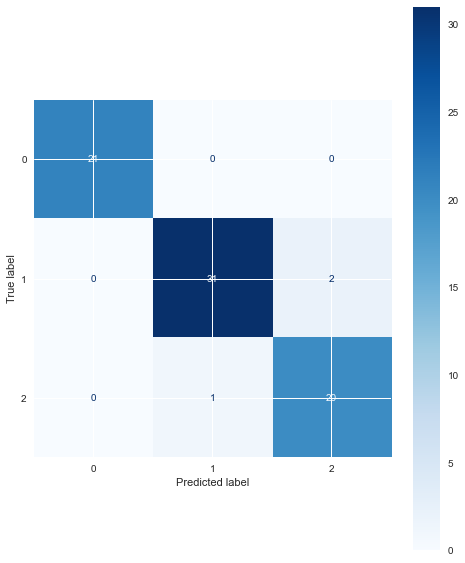

In [69]:
display_cm = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues)
display_cm.figure_.set_size_inches((8,10))

In [67]:
display_cm.figure_.set_size_inches((8,10))

In [68]:
# help(display_cm.figure_.set_size_inches)

In [60]:
display_cm.confusion_matrix

array([[21,  0,  0],
       [ 0, 31,  2],
       [ 0,  1, 20]])

In [61]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.97      0.94      0.95        33
           2       0.91      0.95      0.93        21

    accuracy                           0.96        75
   macro avg       0.96      0.96      0.96        75
weighted avg       0.96      0.96      0.96        75



##### Multi-class Logistic Regressio (Softmax)

In [5]:
iris = ds.load_iris()
# iris

In [6]:
# print(iris['DESCR'])

In [9]:
X, y = ds.load_iris(return_X_y=True)
df = pd.DataFrame(X, columns=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']); df.head(10)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [12]:
X[1]

array([-1.143, -0.132, -1.34 , -1.315])

In [13]:
X = StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.901,  1.019, -1.34 , -1.315],
       [-1.143, -0.132, -1.34 , -1.315],
       [-1.385,  0.328, -1.397, -1.315],
       [-1.507,  0.098, -1.283, -1.315],
       [-1.022,  1.249, -1.34 , -1.315]])

In [26]:
np.var(X[:,2])

0.9999999999999994

In [255]:
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.9733333333333334

In [256]:
print(clf.classes_, clf.coef_, clf.intercept_, clf.n_iter_, sep='\n\n')

[0 1 2]

[[-1.074  1.16  -1.931 -1.812]
 [ 0.588 -0.362 -0.363 -0.826]
 [ 0.486 -0.798  2.294  2.638]]

[-0.205  2.075 -1.87 ]

[25]


In [263]:
yhat_ = clf.predict(X[:, :])

In [258]:
idx = random.randint(0, len(X))
clf.predict_proba(X[idx:idx+1, :])

array([[9.891e-01, 1.088e-02, 1.727e-07]])

In [259]:
clf.predict_proba(X)
clf.predict_proba(X)[0].sum()

1.0

In [262]:
yhat_1 = yhat == 1

NameError: name 'yhat' is not defined

In [261]:
yhat_prob = clf.predict_proba(X); yhat_prob[yhat_1]

In [ ]:
# from sklearn.metrics import log_loss
# log_loss(y_test, yhat_prob)

## Interview Questions